In [56]:
from google.colab import files
uploaded = files.upload()


Saving patient_readmission.csv to patient_readmission (6).csv


 Import Libraries

In [53]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns




**LOAD DATASET**


In [47]:
data = pd.read_csv('patient_readmission.csv')
print(data.head())

   PatientID    Age  Gender AdmissionType      Diagnosis  NumProcedures  \
0          1  50-60  Female        Urgent       Diabetes              2   
1          2  60-70    Male      Elective       Diabetes              4   
2          3  40-50  Female      Elective      Infection              4   
3          4  60-70  Female      Elective         Cancer              0   
4          5  60-70    Male     Emergency  Heart Disease              3   

   NumMedications Readmitted  
0              11         No  
1              16         No  
2               3         No  
3               6        Yes  
4              14         No  


**DATA PREPROCESSING**









In [48]:
# Drop PatientID (not useful for prediction)
df = data.drop("PatientID", axis=1)

# Encode categorical columns
le = LabelEncoder()
for col in ['Age', 'Gender', 'AdmissionType', 'Diagnosis', 'Readmitted']:
    df[col] = le.fit_transform(df[col])

print("\nEncoded Data sample:")
print(df.head())

# Features & Target
X = df.drop("Readmitted", axis=1)
y = df["Readmitted"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Encoded Data sample:
   Age  Gender  AdmissionType  Diagnosis  NumProcedures  NumMedications  \
0    3       0              2          1              2              11   
1    4       1              0          1              4              16   
2    2       0              0          3              4               3   
3    4       0              0          0              0               6   
4    4       1              1          2              3              14   

   Readmitted  
0           0  
1           0  
2           0  
3           1  
4           0  

X_train shape: (800, 6)
X_test shape: (200, 6)


**MODEL** **TRAINING**

In [50]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

 **MODEL** **EVALUATION**

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_log, zero_division=1))

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=1))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       147
           1       1.00      0.00      0.00        53

    accuracy                           0.73       200
   macro avg       0.87      0.50      0.42       200
weighted avg       0.81      0.73      0.62       200



FUTURE IMPORTANCE (RANDOM FOREST)

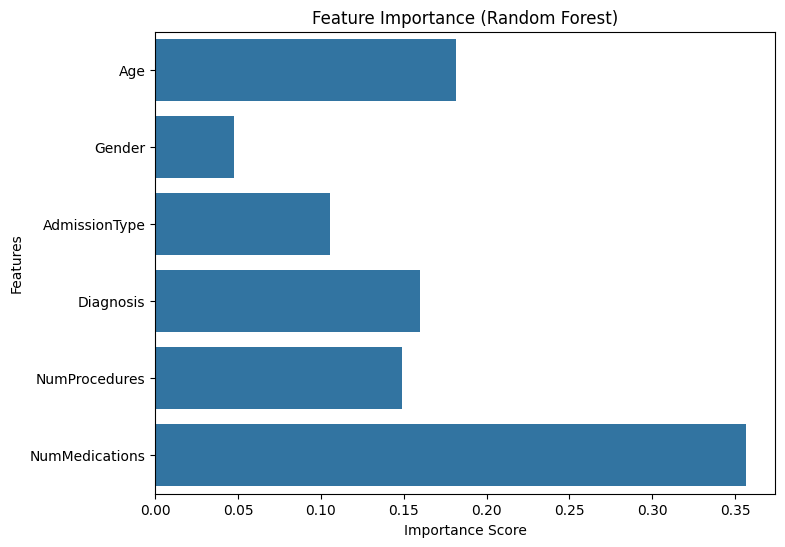

In [52]:
importances = rf_model.feature_importances_
features = df.drop("Readmitted", axis=1).columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()